# Convolutional Neural Network with TensorFlow

This is notebook of hands-on CNN Tutorial with TensorFlow in Datacamp [here](https://www.datacamp.com/community/tutorials/cnn-tensorflow-python).

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data # depecrated on r1.10
from tensorflow.keras.datasets.fashion_mnist import load_data
# for training on GPU
# import os
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

## Load the data

In [2]:
# data = input_data.read_data_sets('data/fashion', one_hot=True, source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/')
data_train, data_test = load_data()

## Explore the data

In [3]:
# shapes of training and test data
print('[INFO] training set (image) shape: ', data_train[0].shape)
print('[INFO] training set (label) shape: ', data_train[1].shape)

print('[INFO] test set (image) shape: ', data_test[0].shape)
print('[INFO] test set (label) shape: ', data_test[1].shape)

[INFO] training set (image) shape:  (60000, 28, 28)
[INFO] training set (label) shape:  (60000,)
[INFO] test set (image) shape:  (10000, 28, 28)
[INFO] test set (label) shape:  (10000,)


In [4]:
data_train

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

For simplicity, a dictionary will be created with corresponding labels class

In [5]:
# create library correspond to label class
label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dresser',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}
label_dict

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dresser',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle Boot'}

### Show the images

Text(0.5,1,'(Label: Ankle Boot)')

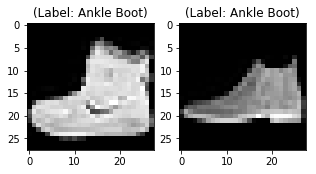

In [6]:
plt.figure(figsize=(5,5))

# first image in training set
plt.subplot(121)
curr_img = np.reshape(data_train[0][0], newshape=(28,28))
curr_lbl = data_train[1][0]
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

# first image in testing set
plt.subplot(122)
curr_img = np.reshape(data_test[0][0], newshape=(28,28))
curr_lbl = data_test[1][0]
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

## Splitting the data into feature and target

Here we will split the `data_train` and `data_test` into `X_train`, `X_label` and `y_train`, `y_label`. Because the result of `load_data` actually comprises 2 tuple of 2 tuples, hence we just need to define it like breaking down a common tuple.

In [7]:
X_train, X_label = data_train
y_train, y_label = data_test
print('[INFO] shape of X_train and X_label:\n{},{}'.format(X_train.shape, X_label.shape))
print('[INFO] shape of y_train and y_label:\n{},{}'.format(y_train.shape, y_label.shape))

[INFO] shape of X_train and X_label:
(60000, 28, 28),(60000,)
[INFO] shape of y_train and y_label:
(10000, 28, 28),(10000,)
